In [1]:
from prody import *

In [2]:
ake4 = parsePDB('4AKE')

@> Connecting wwPDB FTP server RCSB PDB (USA).
@> Downloading PDB files via FTP failed, trying HTTP.
@> 4ake downloaded (4ake.pdb.gz)
@> PDB download via HTTP completed (1 downloaded, 0 failed).
@> 3459 atoms and 1 coordinate set(s) were parsed in 0.03s.


In [3]:
calphas = ake4.select('calpha')

## Gaussian Network Model (GNM)

Assumes isotropic fluctuations (directionless).

### Kirchhoff Matrix

Connectivity. For $N$ residues, the Kirchhoff matrix is $\Gamma \in \mathbb{R}^{N \times N}$, such that:

In [6]:
gnm = GNM('Adenylate Kinase GNM')
gnm.buildKirchhoff(calphas)
gnm.calcModes()

@> Kirchhoff was built in 0.01s.
@> 20 modes were calculated in 0.05s.


[([<matplotlib.lines.Line2D at 0x16ae92dd0>], [], [], [])]

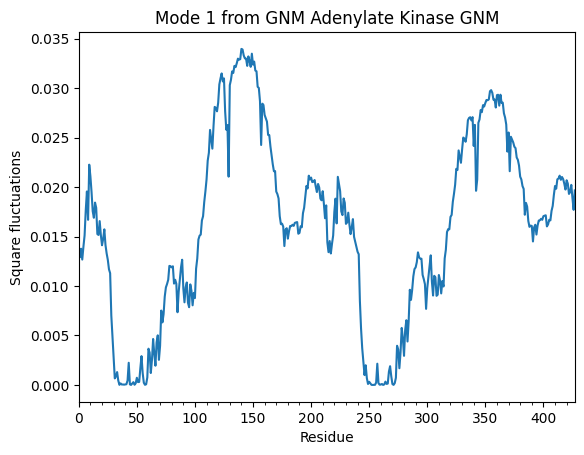

In [7]:
showSqFlucts(gnm[0])

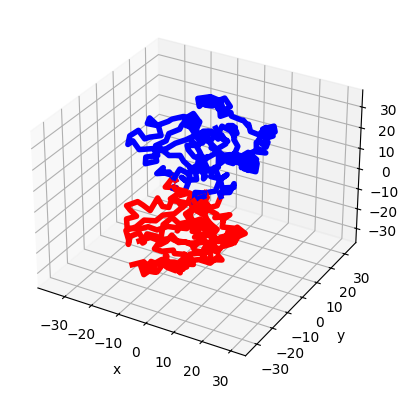

In [8]:
showProtein(calphas, mode=gnm[0]);

In [ ]:
anm = GNM('Adenylate Kinase ANM')